In [1]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import math
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:
print("Shape of training input data set and output data set are {} and {}, respectively.".format(x_train.shape,y_train.shape))
print("Shape of testing input data set and output data set are {} and {}, respectively.".format(x_test.shape,y_test.shape))

Shape of training input data set and training output data set are (60000, 28, 28) and (60000,), respectively 
Shape of testing input data set and testing output data set are (10000, 28, 28) and (10000,), respectively 


In [32]:
# Reshaping the data set (28, 28) -> 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print("New shape of training input data set and output data set are {} and {}, respectively.".format(x_train.shape,y_train.shape))
print("New shape of testing input data set and output data set are {} and {}, respectively.".format(x_test.shape,y_test.shape))

New shape of training input data set and training output data set are (60000, 784) and (60000,), respectively.
New shape of input testing data set and input testing data set are (10000, 784) and (10000,), respectively.


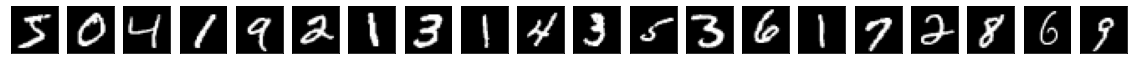

In [31]:
n = 20
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

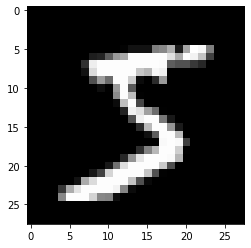

In [33]:
# Normalization
XX_train = x_train.astype('float32')/255
XX_test = x_test.astype('float32')/255
# Image of 1st input of size (28 x 28)
plt.imshow(XX_train[0].reshape(28,28))

In [37]:
XX_train = XX_train.T
XX_test = XX_test.T
Y_train = to_categorical(y_train, num_classes=10).T
Y_test = to_categorical(y_test, num_classes=10).T

print("Shape of training input and output data set are {}, {}, respectively.".format(XX_train.shape, Y_train.shape))
print("Shape of testing input and output data set are {}, {} respectively.".format(XX_test.shape, Y_test.shape))

Shape of training input and output data set are (784, 60000), (10, 60000), respectively.
Shape of testing input and output data set are (784, 10000), (10, 10000) respectively.


In [43]:
# Compute stable softmax of vector 'z'
def softmax(z):
    exps = np.exp(z-np.max(z))
    A = exps/np.sum(exps, axis = 0, keepdims = True) 
    return A

I have used stable softmax function to avoid nan error which occur frequently in case of **A = $e^{z_i}$ / $\sum_{i=0}^m$ $e^{z_i}$** due to floating point limitations in numpy.

In [102]:
# Parameter Initialisation
def initialize_param(d):
    np.random.seed(1)
    w = np.random.randn(d,10) # Take values randomly
    b = np.zeros((10,1))
    params = {'w':w, 'b':b}
    return params

In [82]:
# Forward propagation
def forward(params, X, Y):
    w = params['w']
    b = params['b']
    A = softmax(np.dot(w.T,X) + b)
    m = X.shape[1]
    # Cross Entropy Loss (in logarithmic scale)
    cost = (-1/m) * np.sum( Y * np.log(A + 1e-8))
    return A, cost

Although  **cost = (-1/m) * np.sum( Y * np.log(A))** will work but I have added '1e-8' to the cost function just to avoid division by zero error.

In [83]:
# Back propagation
def backprop(X,Y,A):
  m = X.shape[1]
  dw = (1 / m) * np.dot(X,(A-Y).T)
  db = (1 / m) * np.sum(A - Y)

  return dw, db

In [93]:
def optimize(params, X, Y, num_iterations, l_rate):
  w = params["w"]
  b = params["b"]
  costs = []
  for i in range(num_iterations):
    A,cost = forward(params,X,Y)
    dw,db = backprop(X,Y,A)
    # Perform a parameter update (in the -ve gradient direction to decrease the loss value)
    params["w"] = params["w"] - l_rate*dw 
    params["b"] = params["b"] - l_rate*db
    if i%100 == 0:
      print("Cost on {} iteration: {}, Gradient wrt weight : {}, Gradient wrt bias : {}".format(i, cost,np.linalg.norm(dw),db))
    costs.append(cost)

  return params,costs

In [97]:
def predict(params,X):
  w = params["w"]
  # print(w.shape,X.shape)
  b = params["b"]
  m = X.shape[1]
  A = softmax(np.dot(w.T,X) + b)
  return A

In [86]:
print("Shape of weight :", params['w'].shape)
print("Shape of bias : ", params['b'].shape)
print("Number of parameters for the model : (10*784) + 10")

Shape of weight : (784, 10)
Shape of bias :  (10, 1)
Number of parameters for the model : (10*784) + 10


In [106]:
def model(d, X_train, Y_train, X_test, Y_test, num_iter, l_rate):
  params = initialize_param(d)
  print("Shape of parameter, w : ", params["w"].shape)
  params,costs = optimize(params, X_train, Y_train, num_iter, l_rate)
  Y_hat_train = predict(params,XX_train)
  Y_hat_test = predict(params,XX_test)
  
  print("Train accuracy: {} %".format(round(100 - np.mean(np.abs(Y_hat_train - Y_train)) * 100),2))
  print("Test accuracy: {} %".format(round(100 - np.mean(np.abs(Y_hat_test - Y_test)) * 100),2))
  return params,costs

In [107]:
params,costs = model(784, XX_train, Y_train, XX_test, Y_test, 700, 0.2)

Shape of parameter, w :  (784, 10)
Cost on 0 iteration: 13.699077516460012, Gradient wrt weight : 3.0545634431566984, Gradient wrt bias : 5.779080917515482e-17
Cost on 100 iteration: 2.362212607776464, Gradient wrt weight : 0.286394539712269, Gradient wrt bias : 2.6941412064237135e-18
Cost on 200 iteration: 1.5358754720712928, Gradient wrt weight : 0.14607966712484355, Gradient wrt bias : -2.042810365310288e-18
Cost on 300 iteration: 1.245397957971944, Gradient wrt weight : 0.10042390263278098, Gradient wrt bias : 7.25345709421769e-19
Cost on 400 iteration: 1.090103834421866, Gradient wrt weight : 0.07800084129485978, Gradient wrt bias : -1.7171449447535755e-18
Cost on 500 iteration: 0.9901548040592001, Gradient wrt weight : 0.06462187422238426, Gradient wrt bias : 7.697546304067753e-19
Cost on 600 iteration: 0.9188948494729631, Gradient wrt weight : 0.05564345920132911, Gradient wrt bias : 1.3322676295501879e-18
Train accuracy: 96.0 %
Test accuracy: 96.0 %


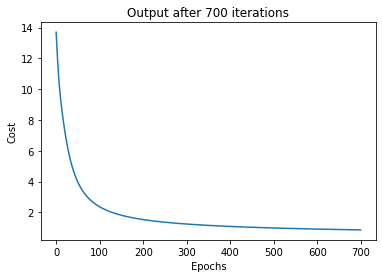

In [105]:
# Plot of Cost Function
plt.plot(range(len(costs)),costs)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Output after 700 iterations");